<a href="https://colab.research.google.com/github/Batorejro/Machine-Learning-boot/blob/main/zadanie19_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# przekształcanie – normalizacja danych
from sklearn.preprocessing import MinMaxScaler

# wizualizacja
import matplotlib.pyplot as plt

# sieci neuronowe
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU

# ewaluacja modelu
from sklearn.metrics import mean_squared_error

In [4]:
dataset = pd.read_csv('airline-passengers.csv')
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset.set_index(['Month'], inplace=True)
dataset

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


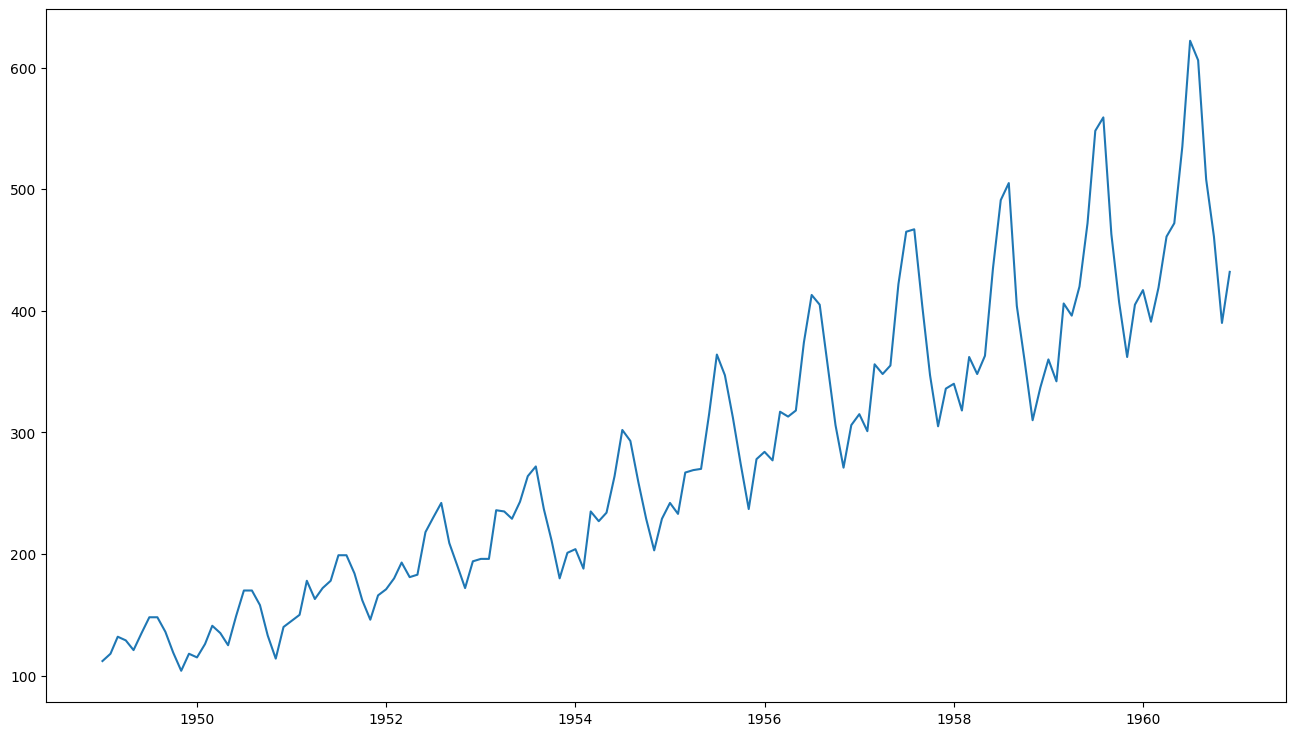

In [5]:
plt.figure(figsize=(16,9))
plt.plot(dataset['Passengers'])
plt.show()

In [6]:
train_size = int(len(dataset) * 0.70)
scaler = MinMaxScaler(feature_range=(0, 1))
look_back = 3
def create_dataset(df, train_size, lback=look_back, scaler_function=scaler):
    test_size = len(df) - train_size
    train, test = df[0:train_size,:].copy(), df[train_size:len(df),:].copy()
    train = scaler_function.fit_transform(train)
    test = scaler_function.transform(test)
    X_train, X_test, y_train, y_test = [], [], [], []

    # Tworzenie zbioru treninowego
    for i in range(len(train)-lback-1):
        a = train[i:(i+lback), 0]
        X_train.append(a)
        y_train.append(train[i + lback, 0])

    # Tworzenie zbioru testowego
    for i in range(len(test)-lback-1):
        a = test[i:(i+lback), 0]
        X_test.append(a)
        y_test.append(test[i + lback, 0])

    X_train, X_test = np.array(X_train), np.array(X_test)
    X_train, X_test = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
    y_train, y_test = np.array(y_train), np.array(y_test)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = create_dataset(df=np.array(dataset), train_size=train_size, lback=look_back)


In [7]:
X_train[:3]

array([[[0.02588997, 0.04530744, 0.09061489]],

       [[0.04530744, 0.09061489, 0.08090615]],

       [[0.09061489, 0.08090615, 0.05501618]]])

In [8]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(5, input_shape=(1, look_back)))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
model_rnn.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4416
Epoch 2/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0851
Epoch 3/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0543
Epoch 4/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0367
Epoch 5/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0338
Epoch 6/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0216
Epoch 7/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0181
Epoch 8/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0166
Epoch 9/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0155
Epoch 10/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0113
Epoch 11/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0105
Epoch 12/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 13/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0121
Epoch 14/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0097
Epoch 15/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0105
Epoch 16/200
96/

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


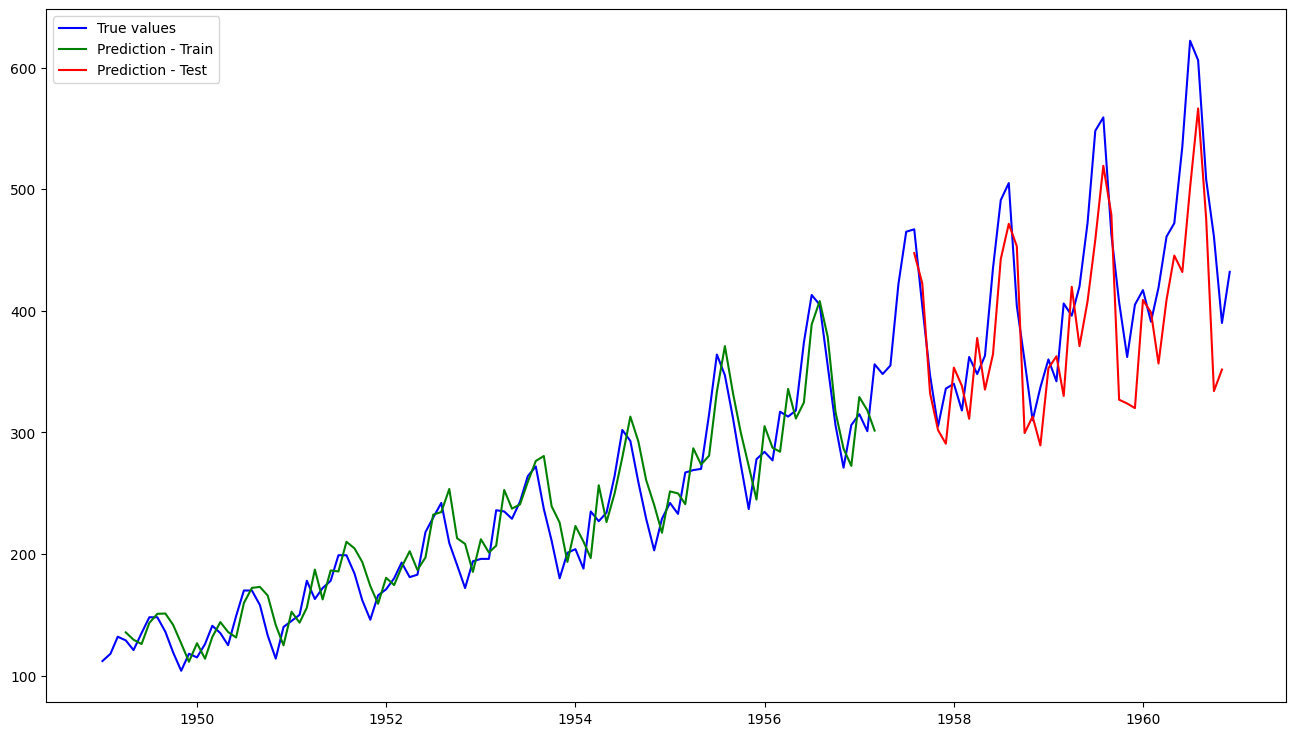


RMSE TEST: 53.78679934046204


In [9]:
def backtests(model, lback=look_back):

    # predykcja - train
    prediction_train = scaler.inverse_transform(model.predict(X_train))
    prediction_train = pd.Series(prediction_train.flatten(),
                                index=dataset.index[lback:len(prediction_train)+lback])

    # predykcja - test
    prediction_test = scaler.inverse_transform(model.predict(X_test))
    prediction_test = pd.Series(prediction_test.flatten(),
                                index=dataset.index[len(prediction_train)+(2*lback)+1:len(dataset)-1])

    # wizualizacja prognozy
    plt.figure(figsize=(16,9))
    plt.plot(dataset['Passengers'], color='blue', label='True values')
    plt.plot(prediction_train, color='green', label='Prediction - Train')
    plt.plot(prediction_test, color='red', label='Prediction - Test')
    plt.legend(loc='upper left')
    plt.show()

    # obliczenie RMSE
    rmse = mean_squared_error(dataset.loc[prediction_test.index, :], prediction_test) ** 0.5
    print(f'\nRMSE TEST: {rmse}')

backtests(model_rnn)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1015
Epoch 2/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0450
Epoch 3/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186
Epoch 4/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145
Epoch 5/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154
Epoch 6/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0131
Epoch 7/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093
Epoch 8/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114
Epoch 9/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091
Epoch 10/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087
Epoch 11/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074
Epoch 12/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0106
Epoch 13/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095
Epoch 14/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0085
Epoch 15/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0115
Epoch 16/200
96/

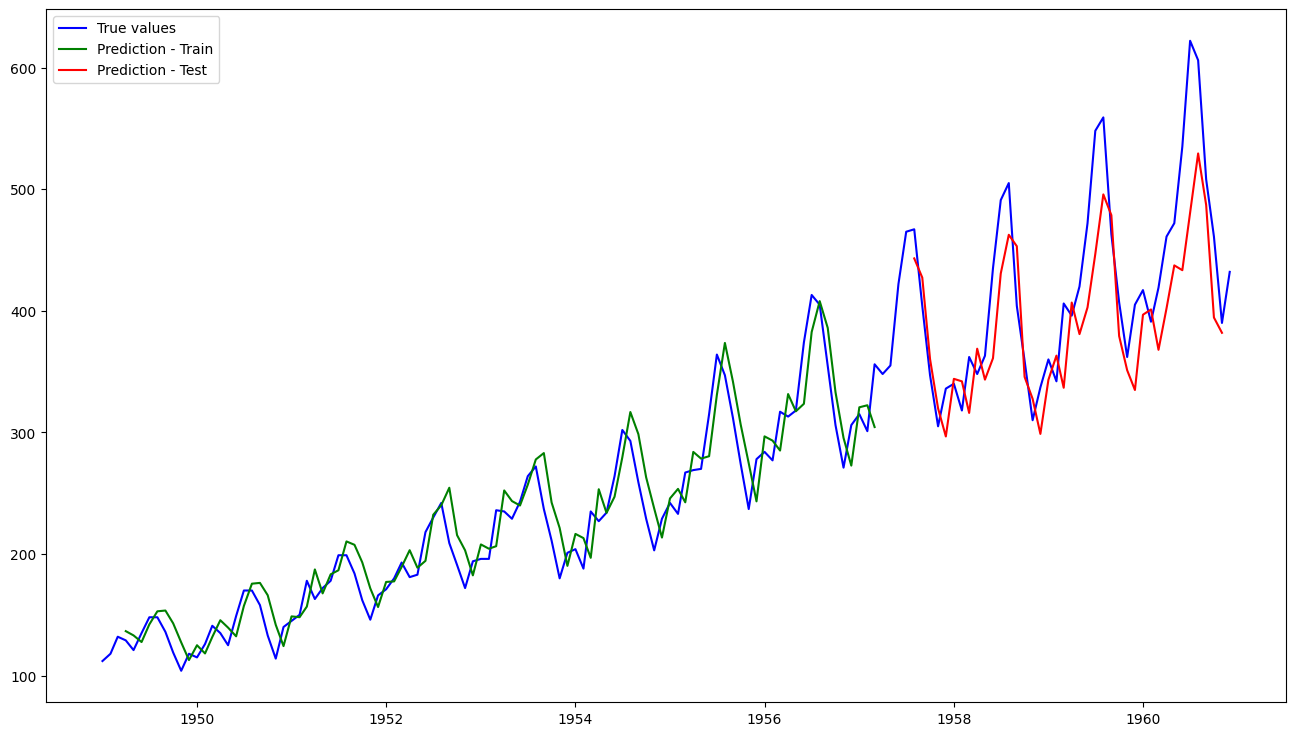


RMSE TEST: 50.769273021006406


In [10]:
model_lstm = Sequential()
model_lstm.add(LSTM(5, input_shape=(1, look_back)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1)
backtests(model_lstm)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1455
Epoch 2/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0478
Epoch 3/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0286
Epoch 4/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0281
Epoch 5/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170
Epoch 6/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0206
Epoch 7/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158
Epoch 8/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0162
Epoch 9/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0149
Epoch 10/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0133
Epoch 11/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114
Epoch 12/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095
Epoch 13/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0095
Epoch 14/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0092
Epoch 15/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0097
Epoch 16/200
96/

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


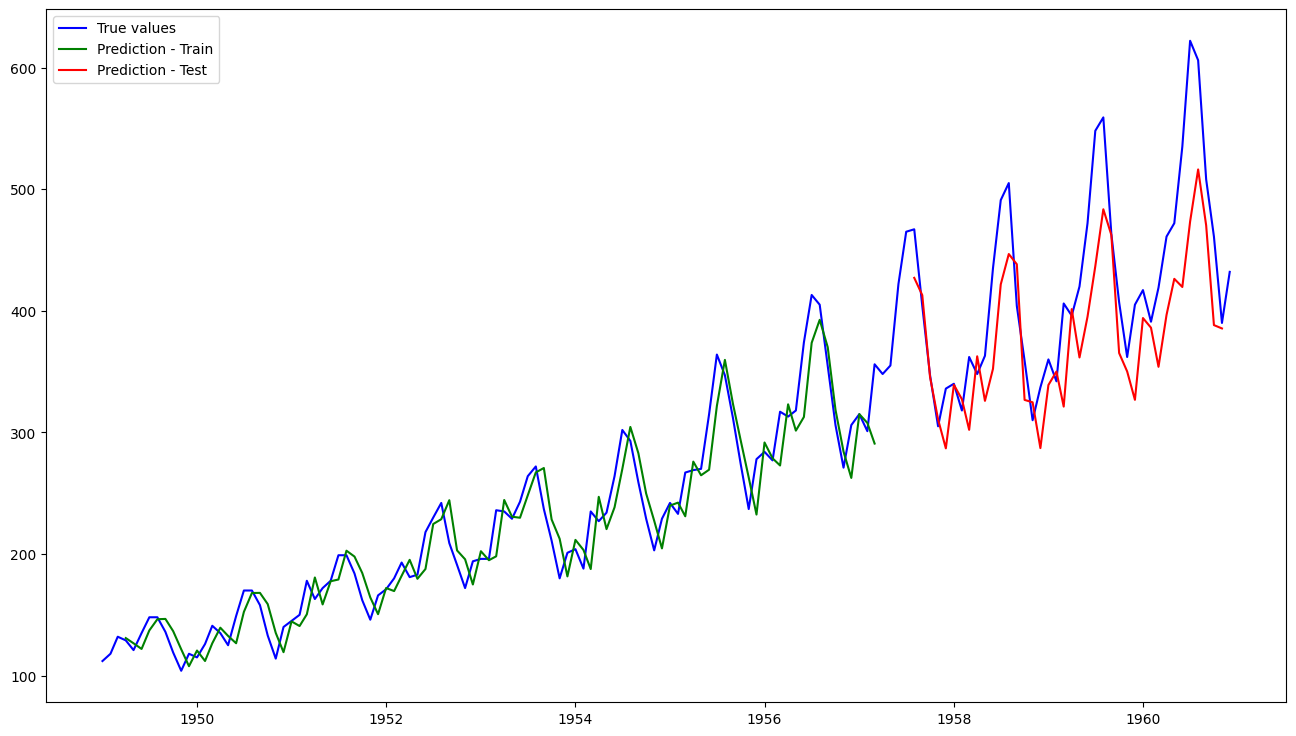


RMSE TEST: 57.82942177497512


In [11]:
model_gru = Sequential()
model_gru.add(GRU(5, input_shape=(1, look_back)))
model_gru.add(Dense(1))
model_gru.compile(loss='mean_squared_error', optimizer='adam')
model_gru.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1)
backtests(model_gru)

In [27]:

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset

dataset = pd.read_csv('airline-passengers.csv', index_col='Passengers')
data = dataset.values

X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])


cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1) # Changed n_splits from 1 to 10
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')


unique_classes, counts = np.unique(y, return_counts=True)
print(f'Class counts: {dict(zip(unique_classes, counts))}')


min_samples_per_class = np.min(counts)
if min_samples_per_class < cv.n_splits:
    cv.n_splits = min_samples_per_class
    print(f'Reduced n_splits to {cv.n_splits} due to low sample count in some classes.')

n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')


print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


ValueError: n_splits=2 cannot be greater than the number of members in each class.